In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [2]:
# load package for loading data
import pandas as pd
url = "https://raw.githubusercontent.com/cnmeow/LinearRegression/main/boston_housing.csv"

In [3]:
housing_dataset = pd.read_csv(url)
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [4]:
X = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [5]:
# load package for spliting data
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

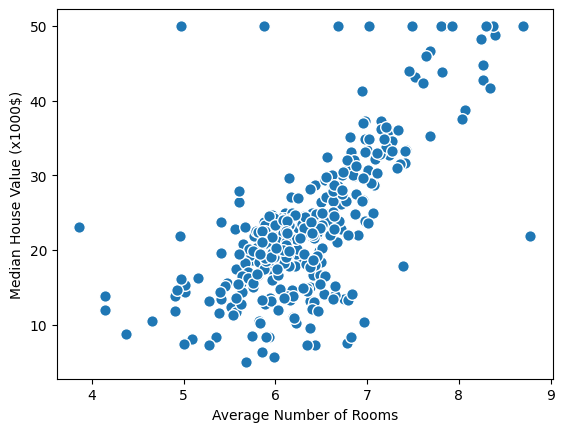

In [7]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [8]:
class LinearRegressionBase:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

    def fit(self, X, y):
        pass

### Gradient Descent

In [9]:
class GradientDescent(LinearRegressionBase):
    def __init__(self, eta=0.001, max_iter=20, random_state=42):
        super().__init__()
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []

    def fit(self, X, y):
        # Initialize weight values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])

        self.costs = []
        for iter_i in range(self.max_iter):  # For each iteration,
            y_pred = self.predict(X)  # Predict output of X
            diff = y - y_pred  # Compute the differences
            self.w[0] += self.eta * np.sum(diff)  # Update intercept
            self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff
            J = 1/2 * np.sum(diff ** 2)  # Compute cost value
            self.costs.append(J)  # Store cost value at ith-iteration

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

#### Learning rate value = 1e-2

<ipython-input-9-8e3a00368aab>:18: RuntimeWarning: invalid value encountered in double_scalars
  self.w[0] += self.eta * np.sum(diff)  # Update intercept
<ipython-input-9-8e3a00368aab>:19: RuntimeWarning: invalid value encountered in add
  self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff


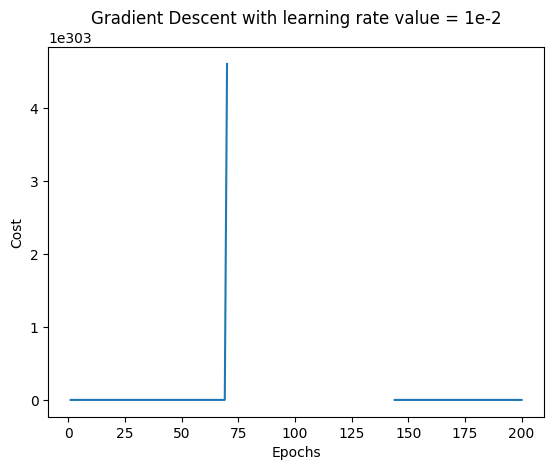

In [10]:
# Initialize the model
reg_GD = GradientDescent(eta=1e-2, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-2')
plt.show()

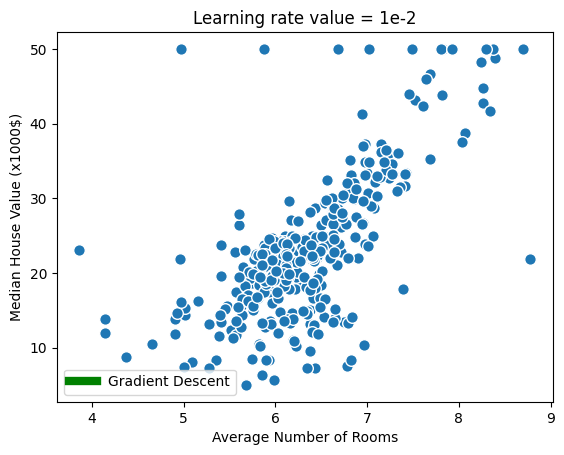

In [11]:
plt.title("Learning rate value = 1e-2")
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

#### Learning rate value = 1e-3

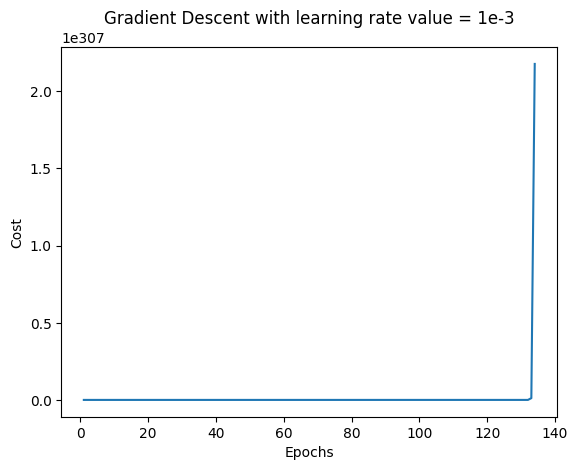

In [12]:
# Initialize the model
reg_GD = GradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-3')
plt.show()

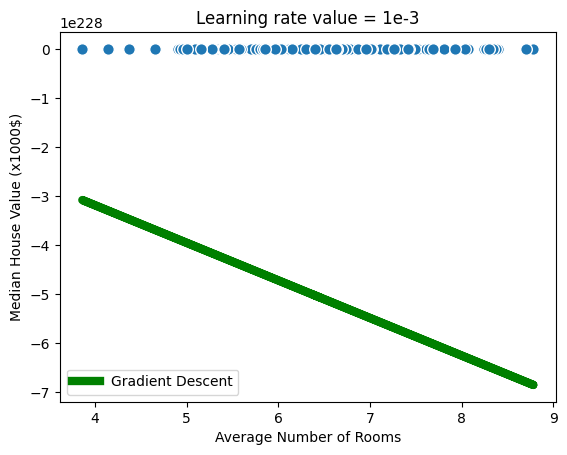

In [13]:
plt.title('Learning rate value = 1e-3')
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

#### Learning rate value = 1e-4 (The suitable learning rate value)

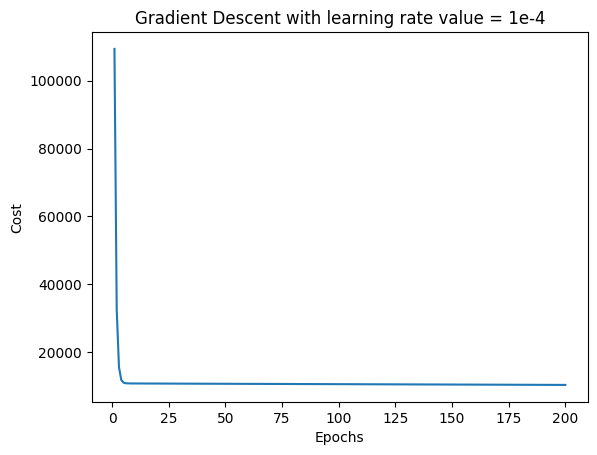

In [14]:
# Initialize the model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-4')
plt.show()

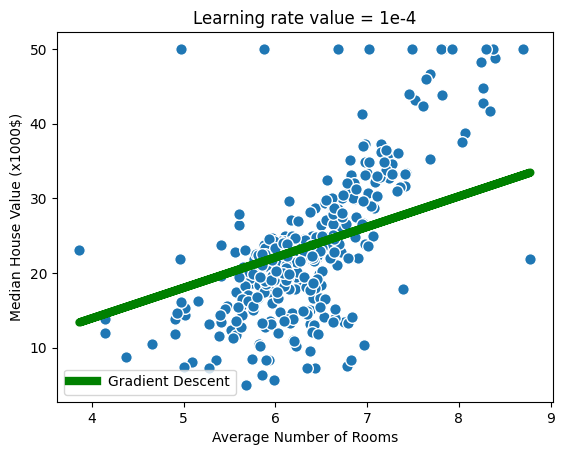

In [15]:
plt.title("Learning rate value = 1e-4")
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [16]:
from sklearn.linear_model import SGDRegressor

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [17]:
# Initialize the model
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=200, random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

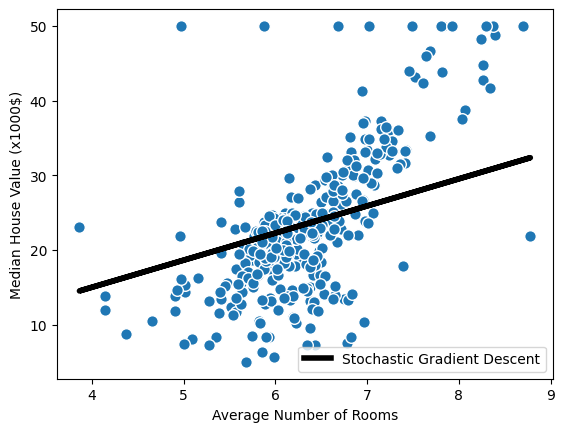

In [18]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

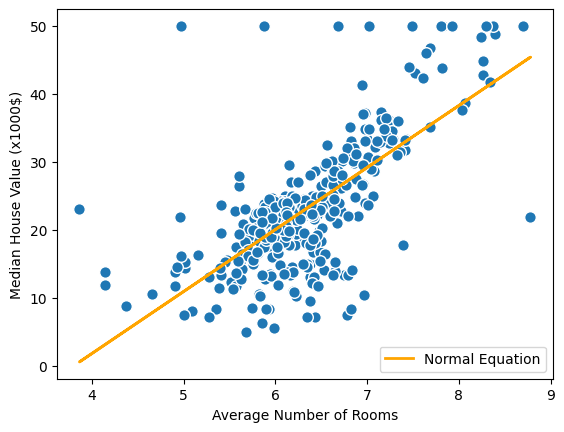

In [21]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

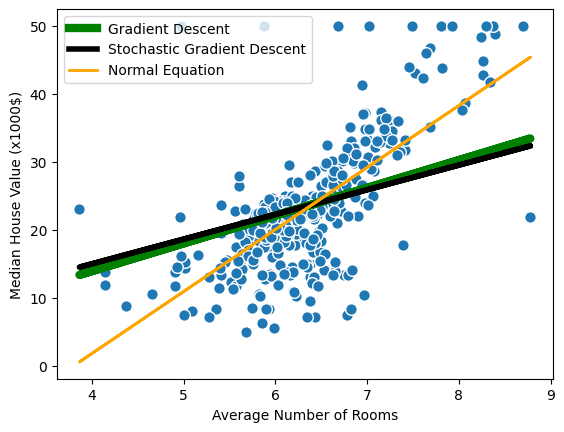

In [22]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [23]:
w_GD = reg_GD.w
w_SGD = [reg_SGD.intercept_, reg_SGD.coef_]
w_NE = [reg_NE.intercept_, reg_NE.coef_]
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[array([0.48447384]), array([3.62945908])]
[-34.662307438406785, array([9.1181022])]


Performance Comparisons (on Testing Set)

In [24]:
y_pred_GD = reg_GD.predict(X_test)

In [25]:
y_pred_SGD = reg_SGD.predict(X_test)

In [26]:
y_pred_NE = reg_NE.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [28]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.413509
MAE of NE: 4.314224


In [29]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 54.750232
MSE of NE: 40.35145


In [30]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.265227
R2 of NE: 0.458465


## Experiment with Standardized Data

In [31]:
# Re-load the dataset
housing_dataset = pd.read_csv(url)

In [32]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [33]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [34]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [35]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

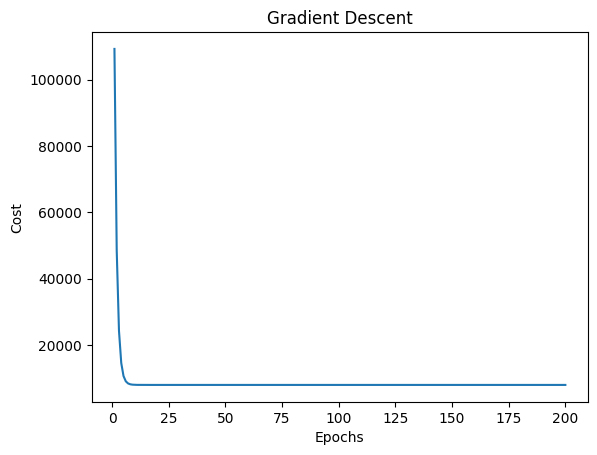

In [36]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



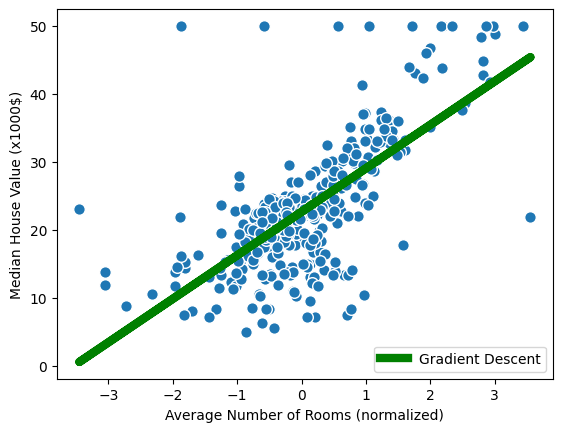

In [37]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [38]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(eta0=1e-3, max_iter=200, random_state=42, learning_rate='constant')

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


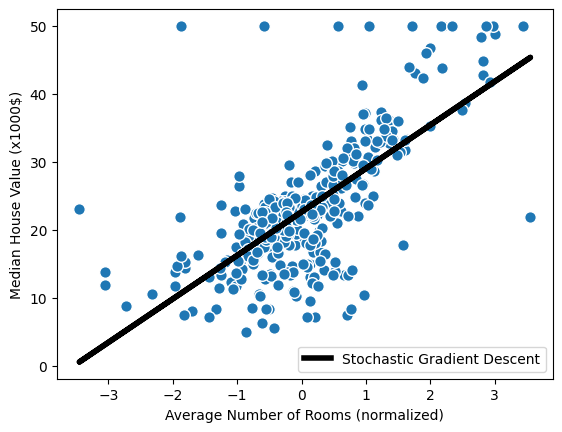

In [39]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [40]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

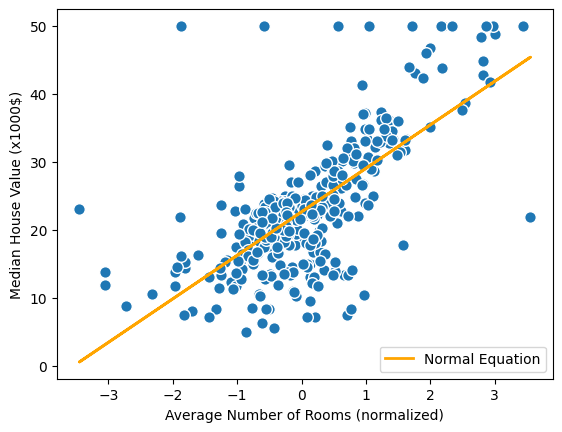

In [41]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

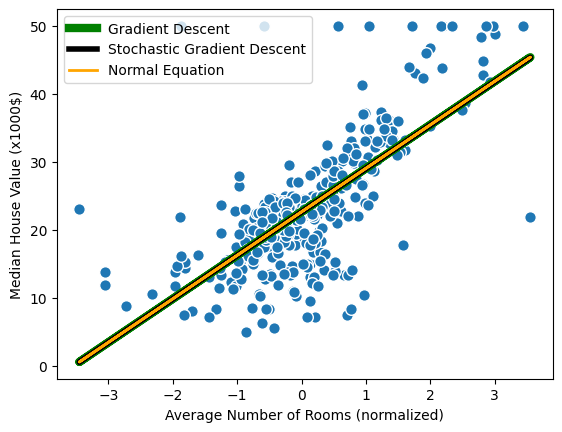

In [42]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [43]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [44]:
w_SGD = [reg_SGD.intercept_, reg_SGD.coef_]
w_SGD

[array([22.62083926]), array([6.39567675])]

In [45]:
w_NE = [reg_NE.intercept_, reg_NE.coef_]
w_NE

[22.641631178156405, array([6.40020122])]

In [46]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [47]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [48]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [49]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.312817
MAE of NE: 4.314224


In [50]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.336472
MSE of NE: 40.35145


In [51]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.458666
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [52]:
# Re-load dataset
housing_dataset = pd.read_csv(url)

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [53]:
X = housing_dataset.drop(columns=['MEDV'])
y = housing_dataset['MEDV']

In [54]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

#### Learning rate value = 1e-3

<ipython-input-9-8e3a00368aab>:19: RuntimeWarning: invalid value encountered in add
  self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff


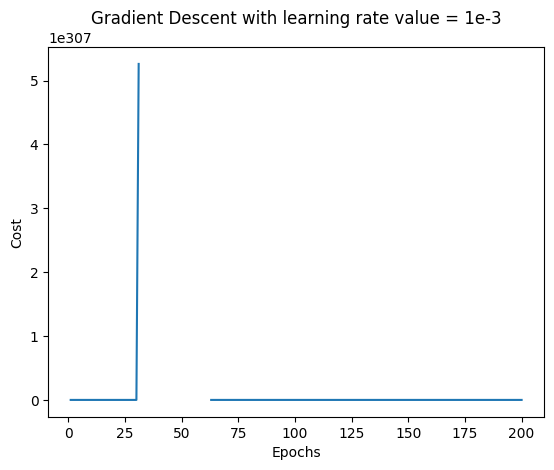

In [55]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-3')
plt.show()

#### Learning rate value = 1e-4

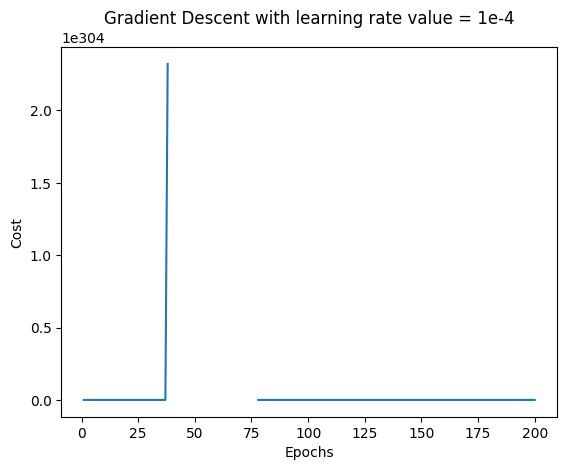

In [56]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-4')
plt.show()

#### Learning rate value = 1e-5

<ipython-input-9-8e3a00368aab>:18: RuntimeWarning: invalid value encountered in double_scalars
  self.w[0] += self.eta * np.sum(diff)  # Update intercept


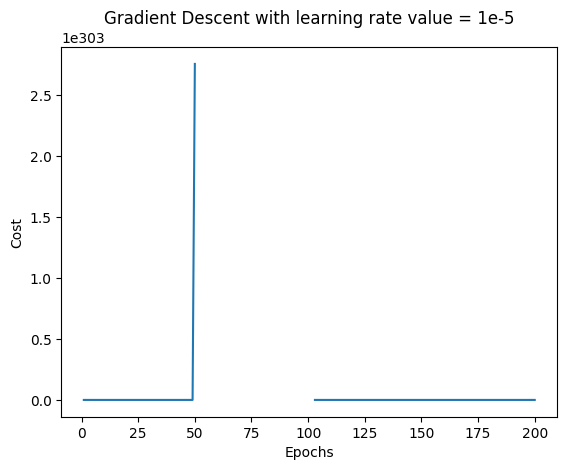

In [57]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-5, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-5')
plt.show()

#### Learning rate value = 1e-6

<ipython-input-9-8e3a00368aab>:19: RuntimeWarning: invalid value encountered in add
  self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff


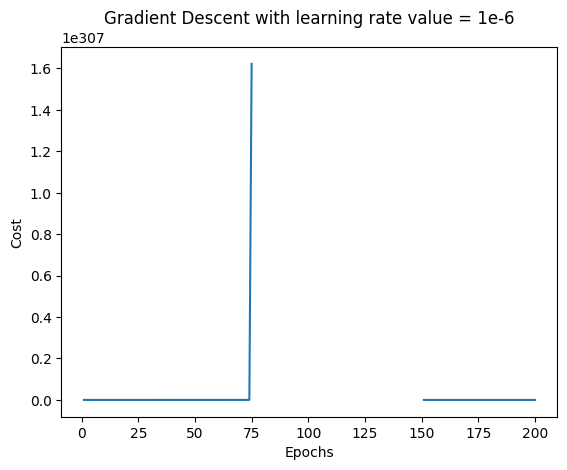

In [58]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-6, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-6')
plt.show()

#### Learning rate value = 1e-7

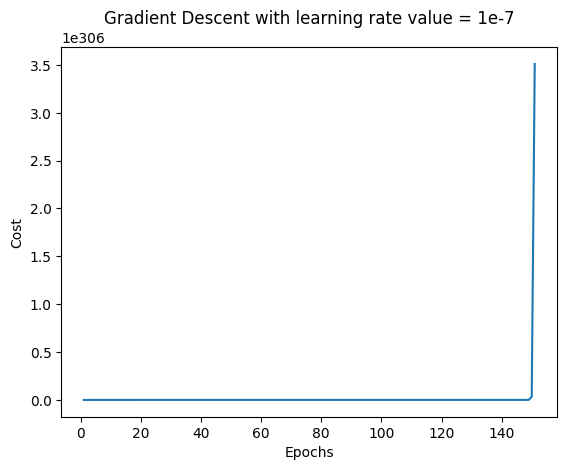

In [59]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-7, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-7')
plt.show()

#### Learning rate value = 1e-8 (The suitable learning rate value)

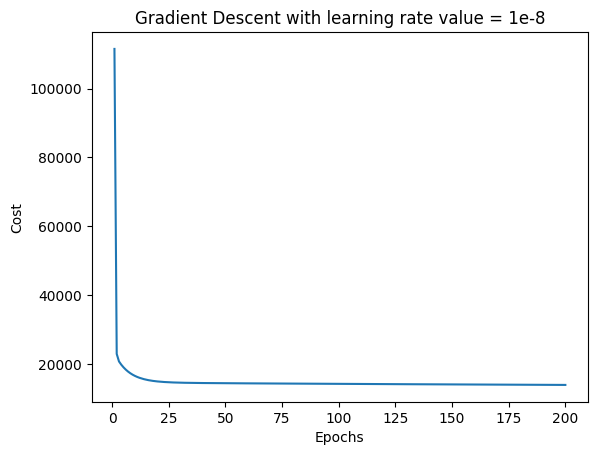

In [60]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-8, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-8')
plt.show()

### Stochastic Gradient Descent

In [61]:
# Initialize the SGD model
reg_SGD = SGDRegressor(eta0=1e-6, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=1e-06, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation

In [62]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

### Algorithms Comparisons

In [63]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [64]:
w_SGD = [reg_SGD.intercept_, reg_SGD.coef_]
w_SGD

[array([0.0053133]),
 array([-0.07706037,  0.11635538, -0.03468359,  0.00438375,  0.00182164,
         0.06621195,  0.05751352,  0.01446087, -0.00856104, -0.00295016,
         0.03837675,  0.05450303, -0.20163726])]

In [65]:
w_NE = [reg_NE.intercept_, reg_NE.coef_]
w_NE

[31.631084035693327,
 array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
        -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
         2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01])]

In [66]:
y_pred_GD = reg_GD.predict(X_test)

In [67]:
y_pred_SGD = reg_SGD.predict(X_test)

In [68]:
y_pred_NE = reg_NE.predict(X_test)

In [69]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 5.836559
MAE of NE: 3.16271


In [70]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 60.845432
MSE of NE: 21.517444


In [71]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: 0.183426
R2 of NE: 0.711226


## Experiment with Standardized Data

In [72]:
# Re-load dataset
housing_dataset = pd.read_csv(url)

In [73]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [74]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [75]:
X_new = housing_dataset.drop(columns=['MEDV'])
y = housing_dataset['MEDV']

In [76]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

#### Learning rate value = 1e-3

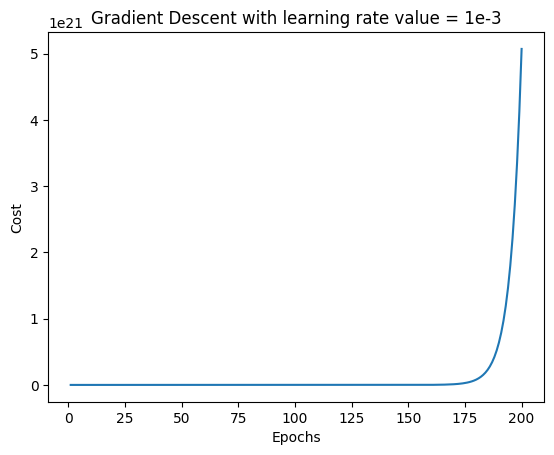

In [77]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-3, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-3')
plt.show()

#### Learning rate value = 1e-5

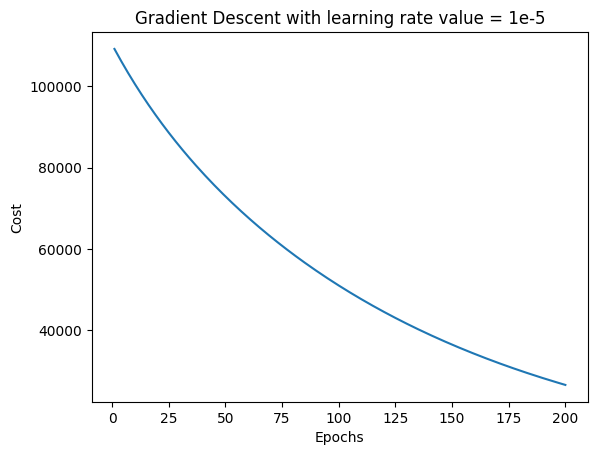

In [78]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-5, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-5')
plt.show()

#### Learning rate value = 1e-4

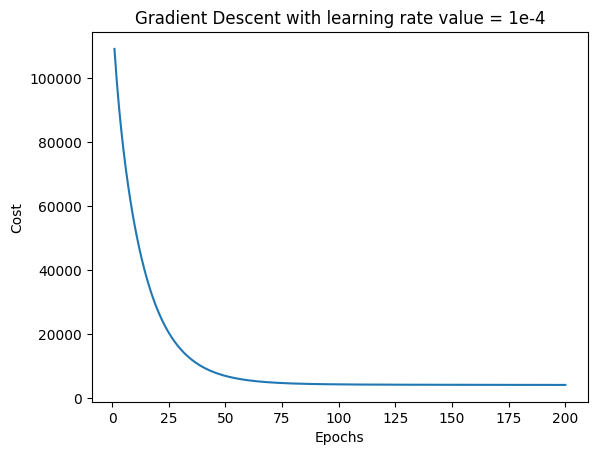

In [79]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-4, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent with learning rate value = 1e-4')
plt.show()

### Stochastic Gradient Descent

In [80]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [81]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [82]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [83]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [84]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [85]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [86]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [87]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [88]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [89]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [90]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

- $R^2$ là chỉ số để đánh giá hiệu suất của mô hình hồi quy tuyến tính. Đó là mức độ biến thiên của target có thể dự đoán được từ các biến independent. Nó được dùng để kiểm tra khả năng tái hiện kết quả quan sát của mô hình tốt đến đâu, phụ thuộc vào tỉ lệ của tổng sai lệch trên kết quả mà mô hình mô tả.

- Công thức:
$R^2 = 1-\frac{SS_{res}}{SS_{tot}}$

  - $SS_{res}$ (Residual sum of squares): Tổng bình phương của các sai số

  - $SS_{tot}$ (Total sum of the errors): Tổng số lỗi

- Ví dụ:

  $R^2$ = 0.68

  Cho thấy rằng 68% sự thay đổi của target có thể giải thích được bằng mô hình, trong khi 32% còn lại của sự biến đổi chưa được giải thích

- $R^2$ cho biết tỉ lệ điểm dữ liệu nằm trong đường thẳng được tạo ra bởi phương trình hồi quy. Một giá trị $R^2$ cao biểu thị một kết quả tốt hơn.